In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
## Scikit Learn
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFromModel
import joblib
import datetime
from sklearn.linear_model import LogisticRegression
## Statsmodel
import statsmodels.api as sm

In [2]:
df = pd.read_csv(r"C:\Users\kadah\Downloads\archive (17)\WineQT.csv")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [6]:
df.shape

(1143, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [11]:
(df.isnull().sum() / len(df)) * 100

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
Id                      0.0
dtype: float64

<Axes: >

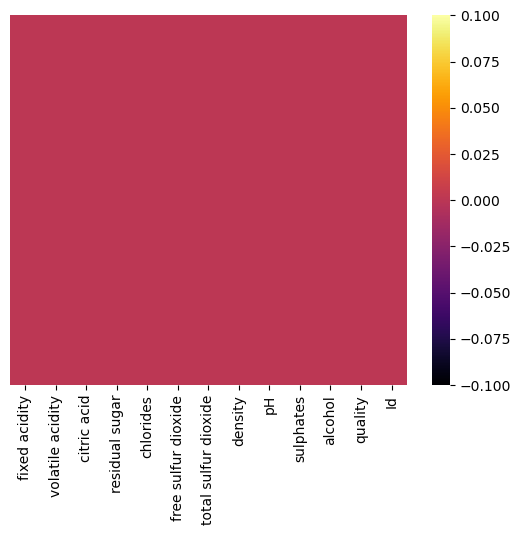

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="inferno")

<Axes: xlabel='fixed acidity', ylabel='Density'>

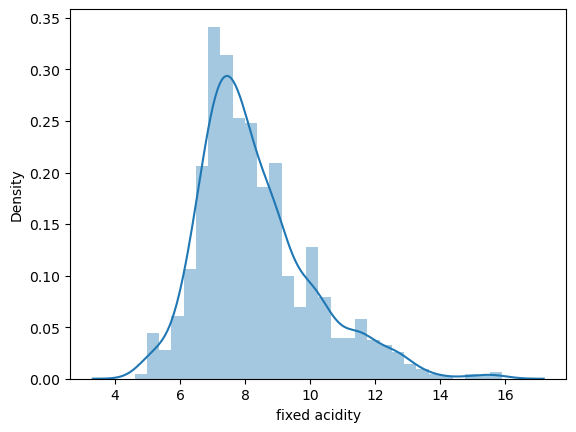

In [13]:
 sns.distplot(df["fixed acidity"]) 

In [14]:
for column in df.columns:
 num_distinct_values = len(df[column].unique())
 print(f"{column}: {num_distinct_values} distinct values")

fixed acidity: 91 distinct values
volatile acidity: 135 distinct values
citric acid: 77 distinct values
residual sugar: 80 distinct values
chlorides: 131 distinct values
free sulfur dioxide: 53 distinct values
total sulfur dioxide: 138 distinct values
density: 388 distinct values
pH: 87 distinct values
sulphates: 89 distinct values
alcohol: 61 distinct values
quality: 6 distinct values
Id: 1143 distinct values


<Axes: >

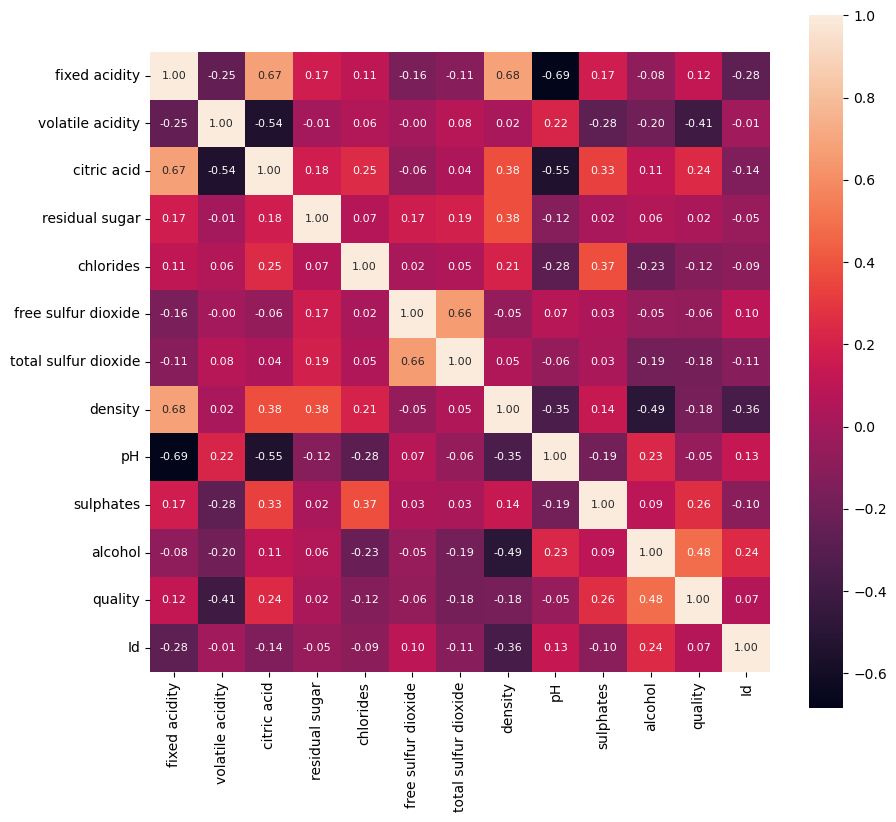

In [15]:
 corr = df.corr()
plt.figure(figsize = (10,9))
sns.heatmap(corr,cbar = True,square = True,fmt = ".2f",annot = True,annot_kws={'size':8})


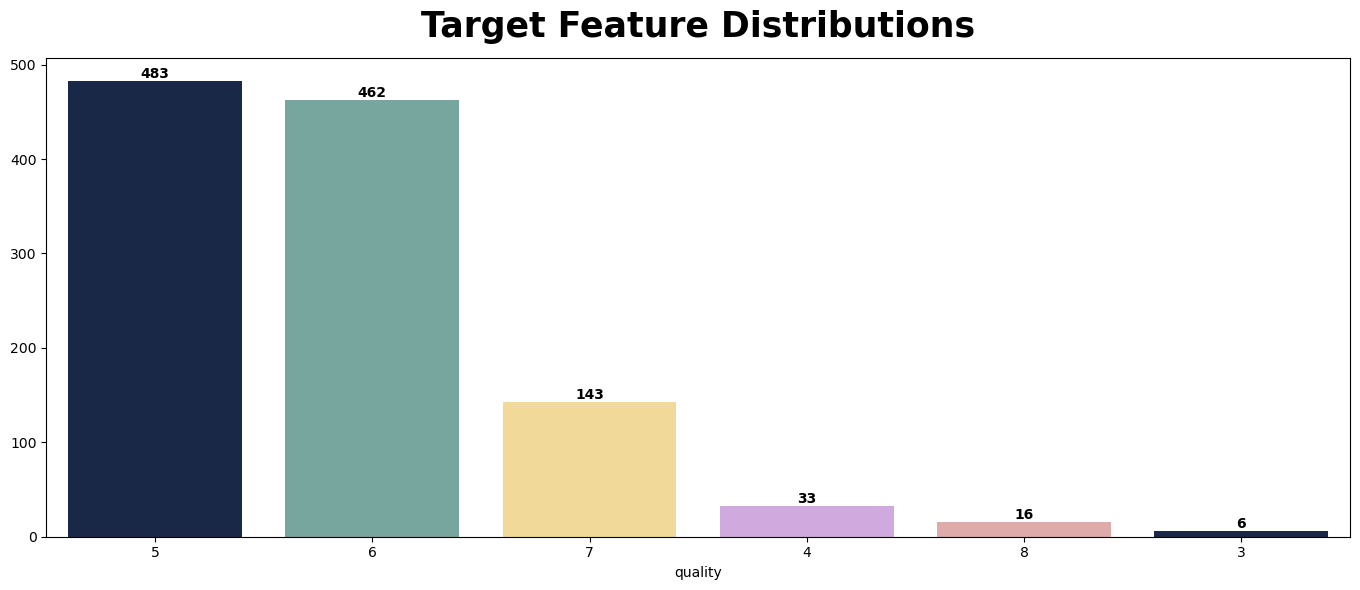

In [16]:
plt.figure(figsize=(13.7,6))
z = df["quality"].value_counts()
sns.barplot(x=z.index, y=z.values, order=z.index, palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Target Feature Distributions",fontweight="black",size=25,pad=15)
for index,value in enumerate(z.values):
 plt.text(index,value,value, ha="center", va="bottom",fontweight="black")
plt.tight_layout()
plt.show()

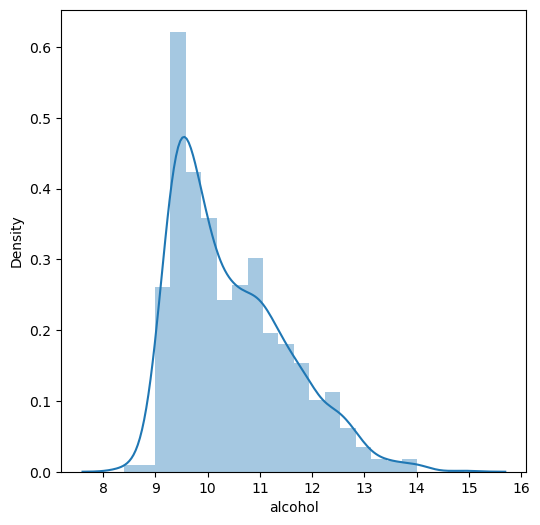

In [17]:
plt.figure(figsize=(6,6))
sns.distplot(df['alcohol'])
plt.show()

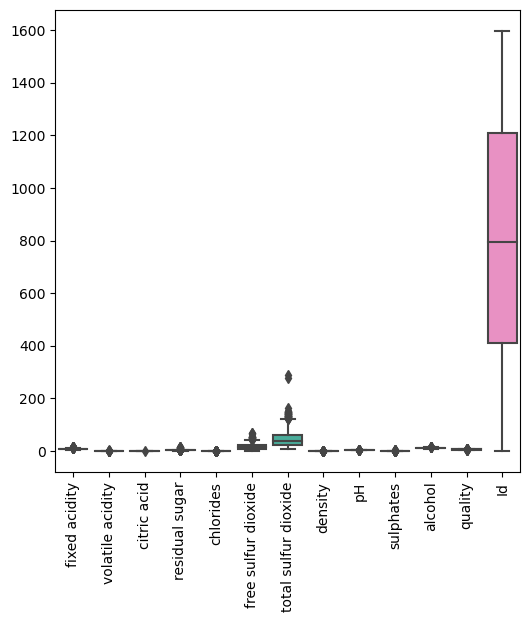

In [22]:
plt.figure(figsize=(6,6))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

In [23]:
# Removing outlier by using z-score method
columns = ['free sulfur dioxide','total sulfur dioxide']
z_scores = np.abs((df[columns] - df[columns].mean()) / df[columns].std())

df_cleaned_zscore = df[(z_scores < 3).all(axis=1)]

print(df_cleaned_zscore.head())

print(f"No of rows after outlier removal: {df_cleaned_zscore.shape[0]}")

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: title={'center': 'Id'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

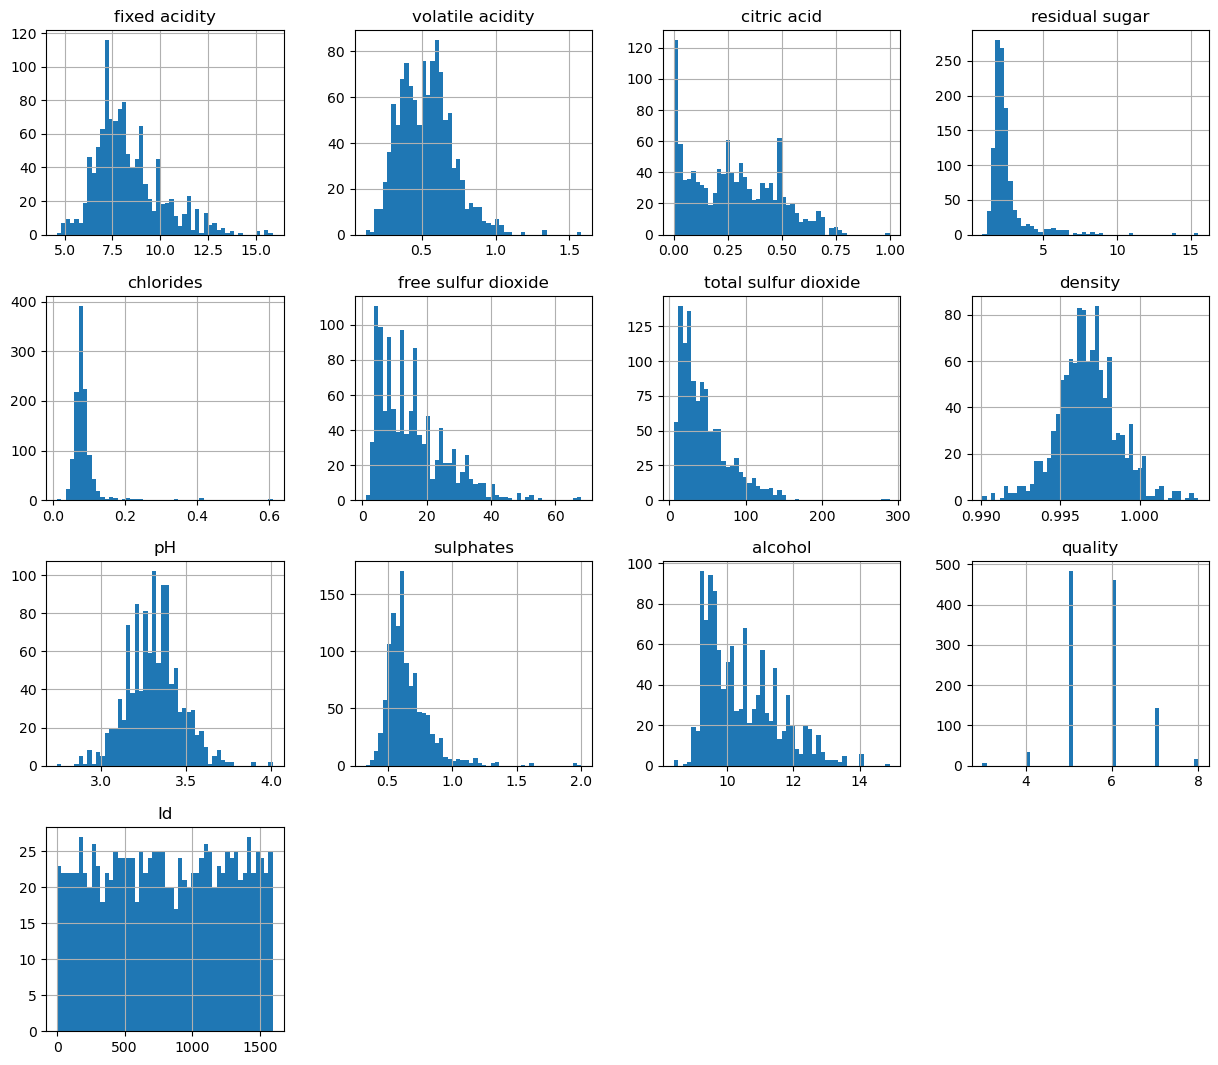

In [25]:
df.hist(figsize=(15,13),bins=50)

In [26]:
x = df.drop(["quality"],axis=1)
y= df["quality"]

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 0)

In [28]:
log = LogisticRegression()

In [29]:
log.fit(x_train,y_train)

LogisticRegression()

In [30]:
print("Train Score: ",log.score(x_train,y_train))

Train Score:  0.49781181619256015


In [31]:
print("Test Score: ",log.score(x_test,y_test))

Test Score:  0.5327510917030568


In [32]:
pred_train = log.predict(x_train)
pred_test = log.predict(x_test)

In [33]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        26
           5       0.59      0.48      0.53       383
           6       0.45      0.73      0.56       370
           7       0.00      0.00      0.00       116
           8       0.00      0.00      0.00        14

    accuracy                           0.50       914
   macro avg       0.17      0.20      0.18       914
weighted avg       0.43      0.50      0.45       914



In [34]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.67      0.49      0.57       100
           6       0.47      0.79      0.59        92
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00         2

    accuracy                           0.53       229
   macro avg       0.19      0.21      0.19       229
weighted avg       0.48      0.53      0.48       229



In [36]:
from sklearn.svm import SVC

In [37]:
svcm = SVC(kernel = 'linear')

In [39]:
svcm.fit(x_train, y_train)

SVC(kernel='linear')

In [40]:
y_pred = svcm.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score, classification_report
acc_svm=accuracy_score(y_test,y_pred)
acc_svm

0.6681222707423581

In [44]:
print('Accuracy: {:.2f}%'.format(acc_svm*100))

Accuracy: 66.81%


In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.73      0.86      0.79       100
           6       0.62      0.66      0.64        92
           7       0.46      0.22      0.30        27
           8       0.00      0.00      0.00         2

    accuracy                           0.67       229
   macro avg       0.30      0.29      0.29       229
weighted avg       0.62      0.67      0.64       229

